# Previsão de fluxo de clientes em um aeroporto

* **Sobre:** O projeto consiste em uma previsão sobre o fluxo de clientes em um aeroporto fictício, com base nos padrões presentes em uma Série Temporal. Este tipo de planejamento futuro pode ser útil para escolher o momento certo para expansão de um negócio, saber quando a demanda de matéria prima e mão de obra será maior, quando fazer uma promoção ou captação ativa de clientes, e afins.

* **Base de Dados:** Quantidade de passageiros computados em um determinado mês e ano.

* **Referência:** Estudo desenvolvido acompanhando o curso [Deep Learning: previsão com Keras](https://cursos.alura.com.br/course/deep-learning-previsao-keras), da Alura.

## Abertura do Dataset

In [1]:
import pandas as pd

In [2]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


* A variável tempo foi definida da seguinte forma:
  * Ano: parte inteira
  * Mês: parte decimal, em que cada mês é representado pelo seu ordinal no ano e dividido por 12. (exemplo: setembro = 9/12, ano + 9/12)

* O dataset é uma série temporal.

## Primeiras visualizações

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

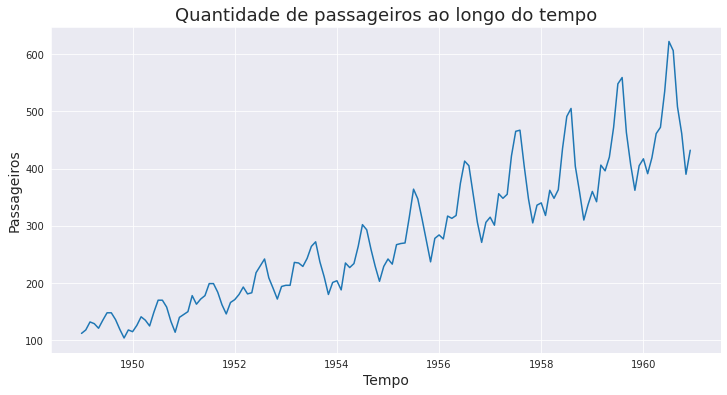

In [45]:
sns.set_style("dark")
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros, x = 'tempo', y = 'passageiros')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Quantidade de passageiros ao longo do tempo', fontsize = 18)
plt.grid(True)

plt.show()

* Há tanto um padrão de crescimento global, quanto um outro padrão que se repete anualmente.

# Pré-processamento dos dados

## Escalonamento

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [23]:
scaled_data = sc.transform(passageiros)

In [31]:
X = scaled_data[:,0]
y = scaled_data[:,1]

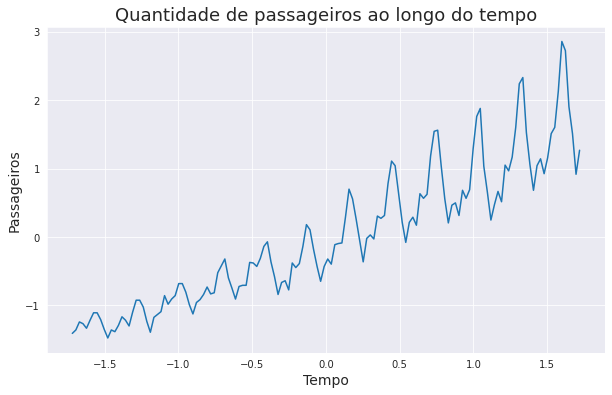

In [28]:
sns.set_style("dark")
plt.figure(figsize = (10, 6))

sns.lineplot(x = X, y = y)

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Quantidade de passageiros ao longo do tempo', fontsize = 18)
plt.grid(True)

plt.show()

* O comportamento permanece o mesmo, mas as escalas foram alteradas.

## Conjuntos de treino e teste

* Os conjuntos foram separados com cortes de arrays para que o conjunto de teste possua os números de passageiros mais recentes, representando o que seria a previsão do modelo.

In [41]:
train_size = int(len(passageiros) * 0.9)
test_size = len(passageiros) - train_size

X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(passageiros)]
y_test = y[train_size:len(passageiros)]

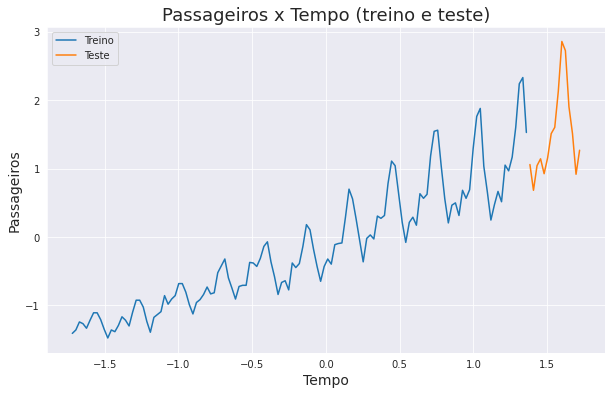

In [46]:
sns.set_style("dark")
plt.figure(figsize = (10, 6))

sns.lineplot(x = X_train, y = y_train, label = 'Treino')
sns.lineplot(x = X_test, y = y_test, label = 'Teste')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (treino e teste)', fontsize = 18)
plt.grid(True)

plt.show()